# Importing the necessary Libraries

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import pandas as panda
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
# Initialize hyper parameters
input_size = 1 # X-Value
output_size = 1 # Y-Value
hidden_size = 4

# Tells you how many data to look back on. For example, 1 tells the computer to only look at the current/most recent one. While a 2 will look back in the previous one and the current one.
sequence_length = 1

num_layers = 3
learning_rate = 0.1 # high learning rate with the Adagrad optimizer 
batch_size = 32
num_epochs = 1000

# Generating the Sine Dataset

In [18]:
# using linspace I was able to generate about 998 numbers in between 0 and 2pi.
xValues = np.linspace(0, 2*math.pi, 1000)
# taking the generated x-values I then ran them through the sine function to get a y-value
yValues = np.sin(xValues)

Text(0.5, 1.0, 'Sine Wave')

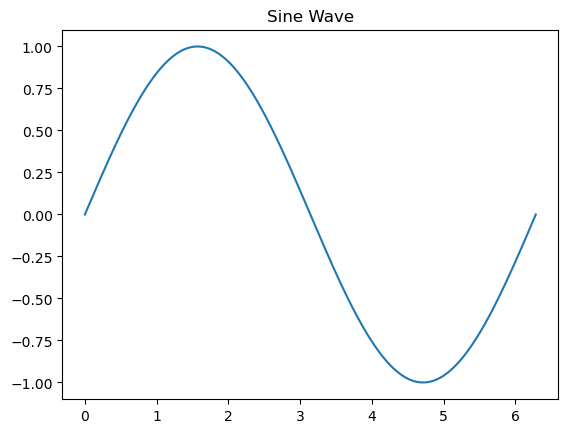

In [19]:
# visualizes the real sine wave
plt.plot(xValues,yValues)
plt.title('Sine Wave')

Combine the Xs and Ys into one dataframe. Mainly because the dataframe is easy to understand. 
Convert said dataframe into a numpy array
Use such numpy array to make into tensor array
Then use the tensor to a dataloader

In [20]:
# Combine the X and Y values into a dataframe mainly for combination of x and y simplicity
SineDF = panda.DataFrame(data = {'X-Values': xValues, 'Y-Values': yValues})
# Use the Dataframe to change to tensor array
SineNPArray = np.expand_dims(SineDF.to_numpy(), axis=1)

xTensor = torch.from_numpy(SineNPArray[:, 0, :1]).float()
yTensor = torch.from_numpy(SineNPArray[:, 0, 1:]).float()

# Now to Dataset/Dataloader
dataset = TensorDataset(xTensor, yTensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
print(dataset)

"""
# split the datasets
# xTr, xTe = xValues[:640], xValues[640:]
# yTr, yTe = yValues[:640], yValues[640:]
# convert the numpy arrays into tensor for better performance
# xTrainData = torch.from_numpy(xTr)
# xTestData = torch.from_numpy(xTe)
# yTrainData = torch.from_numpy(yTr)
# yTestData = torch.from_numpy(yTe)
"""

'\n# split the datasets\n# xTr, xTe = xValues[:640], xValues[640:]\n# yTr, yTe = yValues[:640], yValues[640:]\n# convert the numpy arrays into tensor for better performance\n# xTrainData = torch.from_numpy(xTr)\n# xTestData = torch.from_numpy(xTe)\n# yTrainData = torch.from_numpy(yTr)\n# yTestData = torch.from_numpy(yTe)\n'

# Creating the RNN Model

In [21]:
class SineRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(SineRNN, self).__init__() 
        
        self.hidden_size = hidden_size # initialize the hidden size
       
        self.num_layers = num_layers # initialize the number of layers
       
        self.rnn = nn.RNN(input_size = input_size, hidden_size=hidden_size, num_layers = num_layers, batch_first = True) 
        # The layer above uses Pytorch's RNN and passes in the proper parameters
        
        self.fc = nn.Linear(hidden_size, output_size)
        # This is the fully connected layer with a linear transformation 
   
    def forward(self, x): # In this method the input is fed into the model which is then used to create an output
        # I need clarification in this part of the model, got no idea how these lines below accomplish the purpose of the forward method
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Train the Model

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
Epoch [10/1000], Loss: 0.07696
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
1
2
3
4
5
6


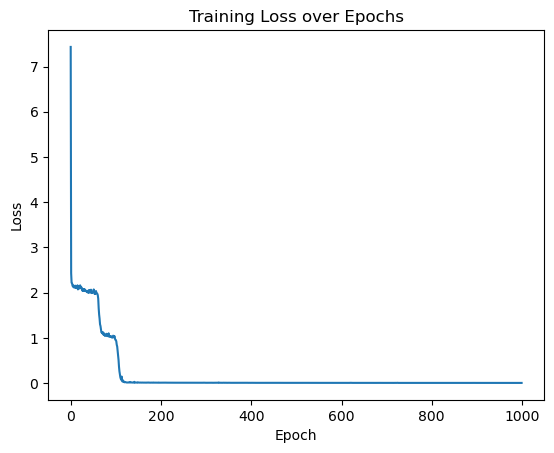

In [22]:
model = SineRNN(input_size, hidden_size, output_size, num_layers) # defines the model and inserts the proper parameters 
criterion = nn.MSELoss() # helps calculate the loss
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate) # I chose Adagrad as I am most familiar
losses = [] # The loss array for the graph

for epoch in range(num_epochs):
    epoch_loss = 0.0 # start loss value for each batch
    model.train(True)

    for inputs, targets in dataloader:
        print(index)
        optimizer.zero_grad() # clears the gradient
        outputs = model(inputs.unsqueeze(1))
        loss = criterion(outputs, targets)
        
        loss.backward() # applies backpropogation
        optimizer.step() # updates model parameters
        
        epoch_loss += loss.item() # calculates total loss
        
    losses.append(epoch_loss)

    if (epoch + 1) % 10 == 0: ## Only prints the tench epoch
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.5f}')
    
plt.figure()
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

# Model Test

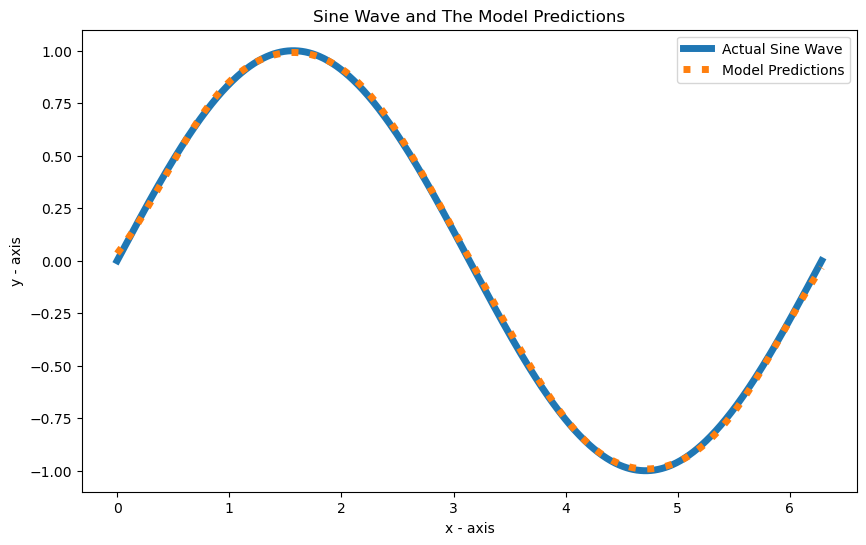

In [23]:
with torch.no_grad():
    model.eval()
    predictions = model(xTensor.unsqueeze(1))

plt.figure(figsize=(10, 6))
plt.plot(xValues, yValues, linewidth = '5', label='Actual Sine Wave')
plt.plot(xValues, predictions.numpy(), linewidth = '5', linestyle = ':', label='Model Predictions')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Sine Wave and The Model Predictions')
plt.legend()
plt.show()